In [1]:
# exctract the text and understand its https
import requests
from bs4 import BeautifulSoup

# HTTP request
url = 'https://medium.com/the-economist/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af'
response = requests.get(url)

# Parse the HTML content with Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
for element in soup(['script', 'style', 'comment']):
    element.extract()

# Extract the visible text
text = soup.get_text(separator=' ')

# Print the extracted text
print(text)

The world’s reefs are dying. Here’s how to save them | by The Economist | The Economist Open in app Sign up Sign In Write Sign up Sign In The world’s reefs are dying. Here’s how to save them Though pollution and overuse are damaging corals, their biodiversity offers hope for their future The Economist · Follow Published in The Economist · 9 min read · Apr 4, 2017 -- 3 Listen Share In this edition of our series on the animal world, we’re going under the sea with an article from last year that’s as rich in style as it is in scientific substance The waters off the Hawaiian island of Oahu are visited each winter by migrating marine mammals such as humpback whales. All year round they are home to much smaller animals that form vast reefs: corals. Intricate pink structures stand out amid contortions of vegetable-green ones; dark-striped fish flit among them and turtles hover above. Corals lay down limestone skeletons of different shapes and sizes: branching types like small trees; ground-hug

In [2]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

print(get_and_parse('https://medium.com/the-economist/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af'))

The world’s reefs are dying. Here’s how to save them | by The Economist | The Economist Open in app Sign up Sign In Write Sign up Sign In The world’s reefs are dying. Here’s how to save them Though pollution and overuse are damaging corals, their biodiversity offers hope for their future The Economist · Follow Published in The Economist · 9 min read · Apr 4, 2017 -- 3 Listen Share In this edition of our series on the animal world, we’re going under the sea with an article from last year that’s as rich in style as it is in scientific substance The waters off the Hawaiian island of Oahu are visited each winter by migrating marine mammals such as humpback whales. All year round they are home to much smaller animals that form vast reefs: corals. Intricate pink structures stand out amid contortions of vegetable-green ones; dark-striped fish flit among them and turtles hover above. Corals lay down limestone skeletons of different shapes and sizes: branching types like small trees; ground-hug

In [3]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [35]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find('element')
    return elements

In [36]:
url = 'https://medium.com/the-economist/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af'

In [37]:
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [38]:
for p in paragraphs:
  print(p.text)

In [39]:
for a in links:
  print(a.text)

In [40]:
points = parse_elements(url, 'li')

In [41]:
for point in points:
  print(point.text)

In [42]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [43]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

In [44]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [45]:
# create the word sentiment detection by defining the words from the article that interest the most
def sentiment_detection(sentence):
    positive_words = ('happy', 'hope', 'photosynthesise', 'triumphant', 'support', 'beautiful')
    negative_words = ('dying', 'threatened', 'pollution', 'phenomenon', 'bleaching', 'pressure')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

In [46]:
#repurpose our sentiment analysis as topic detection
#detect are people talking about data science, AI, or data in general?
def topic_detection(sentence):
    SaveNature_words = ('scientific', 'cover', 'protect', 'conservation', 'identify', 'Biological Diversity', 'biodiversity')
    reefs_word = ('reefs', 'corals', 'species', 'sea', 'whales', 'mammals', 'ecosystems', 'MPA', 'UN', 'NOAA')
    HelpWords = ('pollution', 'migrating','shapes and sizes','help','policies','kill')
    SaveNature = any(sentence.count(i) > 0 for i in SaveNature_words)
    reefs = any(sentence.count(i) > 0 for i in reefs_word)
    help = any(sentence.count(i) > 0 for i in HelpWords)
    topics = []
    if SaveNature == True:
        topics.append("Save Nature")
    if reefs == True:
        topics.append("reefs")
    if help == True:
        topics.append("help")
    return topics


In [47]:

url = 'https://medium.economist.com/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')


In [48]:
#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      #print((paragraphs[p].text))
      #print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

In [49]:
p_dictionary['Topics']

[['Save Nature', 'reefs'],
 ['reefs', 'help'],
 ['reefs'],
 ['reefs'],
 ['reefs', 'help'],
 ['reefs'],
 ['Save Nature', 'reefs'],
 ['Save Nature', 'reefs'],
 ['reefs', 'help'],
 ['Save Nature', 'reefs'],
 ['reefs'],
 ['reefs', 'help'],
 ['reefs'],
 ['reefs', 'help'],
 ['Save Nature', 'reefs'],
 ['Save Nature', 'reefs'],
 ['Save Nature', 'reefs', 'help'],
 ['Save Nature'],
 ['reefs'],
 ['reefs'],
 ['reefs'],
 ['Save Nature', 'reefs'],
 ['reefs', 'help'],
 ['help'],
 ['Save Nature', 'reefs'],
 ['reefs', 'help'],
 ['reefs', 'help'],
 ['reefs', 'help'],
 ['reefs', 'help'],
 ['reefs'],
 ['reefs', 'help'],
 []]

In [50]:
medium_df = pd.DataFrame(p_dictionary)

In [51]:
medium_df.head(10)

,Paragraphs,Topics
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]"
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]"
2,The colours that lure snorkelling and scuba-dr...,[reefs]
3,Reefs will be reduced to bleached-looking skel...,[reefs]
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]"
5,Only twice before has such bleaching occurred ...,[reefs]
6,Coral reefs are found from the Middle East to ...,"[Save Nature, reefs]"
7,"In the past half-century, though, these beauti...","[Save Nature, reefs]"
8,More damage is caused by fertiliser-rich run-o...,"[reefs, help]"
9,"Crown-of-thorns starfish, coral-chompers that ...","[Save Nature, reefs]"


In [52]:
medium_df['Character Count'] = medium_df['Paragraphs'].apply(lambda x: len(x))

In [53]:
medium_df.head(10)

,Paragraphs,Topics,Character Count
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]",164
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]",472
2,The colours that lure snorkelling and scuba-dr...,[reefs],413
3,Reefs will be reduced to bleached-looking skel...,[reefs],74
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]",648
5,Only twice before has such bleaching occurred ...,[reefs],541
6,Coral reefs are found from the Middle East to ...,"[Save Nature, reefs]",696
7,"In the past half-century, though, these beauti...","[Save Nature, reefs]",408
8,More damage is caused by fertiliser-rich run-o...,"[reefs, help]",415
9,"Crown-of-thorns starfish, coral-chompers that ...","[Save Nature, reefs]",388


In [54]:
medium_df['Topic Count'] = medium_df['Topics'].apply(len)
medium_df.head()

,Paragraphs,Topics,Character Count,Topic Count
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]",164,2
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]",472,2
2,The colours that lure snorkelling and scuba-dr...,[reefs],413,1
3,Reefs will be reduced to bleached-looking skel...,[reefs],74,1
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]",648,2


In [55]:
medium_df['Sentiment'] = medium_df['Paragraphs'].apply(sentiment_detection)

In [56]:
medium_df.head(10)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]",164,2,neutral
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]",472,2,neutral
2,The colours that lure snorkelling and scuba-dr...,[reefs],413,1,negative
3,Reefs will be reduced to bleached-looking skel...,[reefs],74,1,neutral
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]",648,2,mixed
5,Only twice before has such bleaching occurred ...,[reefs],541,1,negative
6,Coral reefs are found from the Middle East to ...,"[Save Nature, reefs]",696,2,positive
7,"In the past half-century, though, these beauti...","[Save Nature, reefs]",408,2,mixed
8,More damage is caused by fertiliser-rich run-o...,"[reefs, help]",415,2,neutral
9,"Crown-of-thorns starfish, coral-chompers that ...","[Save Nature, reefs]",388,2,neutral


In [57]:
# where the topic words are used and the amount that includes in sentences
category_amount = medium_df['Sentiment'].value_counts()
print(category_amount)
print(list(category_amount))
print(list(category_amount.keys()))

neutral     24
negative     3
mixed        3
positive     2
Name: Sentiment, dtype: int64
[24, 3, 3, 2]
['neutral', 'negative', 'mixed', 'positive']


In [58]:
medium_df['reefs'] = np.where('reefs' in medium_df['Topics'][0], 1, 0)

In [59]:
medium_df.head(10)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,reefs
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]",164,2,neutral,1
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]",472,2,neutral,1
2,The colours that lure snorkelling and scuba-dr...,[reefs],413,1,negative,1
3,Reefs will be reduced to bleached-looking skel...,[reefs],74,1,neutral,1
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]",648,2,mixed,1
5,Only twice before has such bleaching occurred ...,[reefs],541,1,negative,1
6,Coral reefs are found from the Middle East to ...,"[Save Nature, reefs]",696,2,positive,1
7,"In the past half-century, though, these beauti...","[Save Nature, reefs]",408,2,mixed,1
8,More damage is caused by fertiliser-rich run-o...,"[reefs, help]",415,2,neutral,1
9,"Crown-of-thorns starfish, coral-chompers that ...","[Save Nature, reefs]",388,2,neutral,1


In [60]:
medium_df['help'] = medium_df['Topics'].apply(lambda x:1 if 'help' in x else 0)

In [61]:
medium_df.head(10)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment,reefs,help
0,In this edition of our series on the animal wo...,"[Save Nature, reefs]",164,2,neutral,1,0
1,The waters off the Hawaiian island of Oahu are...,"[reefs, help]",472,2,neutral,1,1
2,The colours that lure snorkelling and scuba-dr...,[reefs],413,1,negative,1,0
3,Reefs will be reduced to bleached-looking skel...,[reefs],74,1,neutral,1,0
4,"Overfishing, tourism and pollution are the mos...","[reefs, help]",648,2,mixed,1,1
5,Only twice before has such bleaching occurred ...,[reefs],541,1,negative,1,0
6,Coral reefs are found from the Middle East to ...,"[Save Nature, reefs]",696,2,positive,1,0
7,"In the past half-century, though, these beauti...","[Save Nature, reefs]",408,2,mixed,1,0
8,More damage is caused by fertiliser-rich run-o...,"[reefs, help]",415,2,neutral,1,1
9,"Crown-of-thorns starfish, coral-chompers that ...","[Save Nature, reefs]",388,2,neutral,1,0


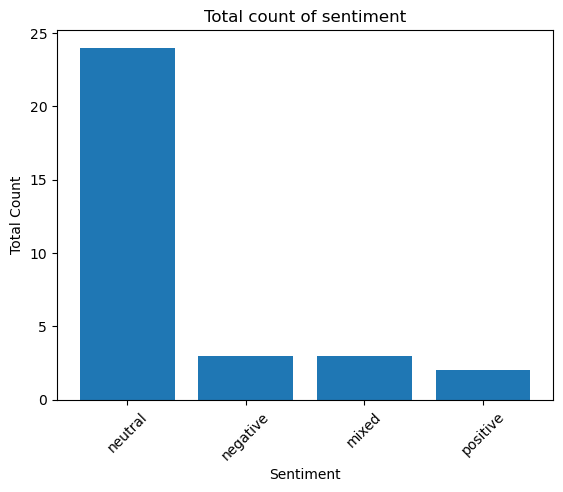

In [62]:
import matplotlib.pyplot as plt

#find out the interactions of topics in the article

# Extract category names and corresponding amounts
#categories = list(category_amount.keys())
#amounts = list(category_amount.values())

# Plotting the bar graph
plt.bar(list(category_amount.keys()), list(category_amount))

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Total count of sentiment')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [63]:
topic_counts = [medium_df['reefs'].sum(), medium_df['help'].sum()]
topic_labels = ['reefs', 'help']

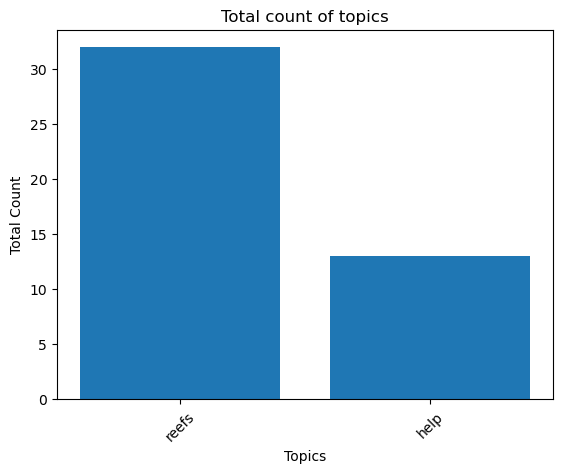

In [64]:
# Plotting the bar graph for finding out what topic is mostly used in the article
plt.bar(topic_labels, topic_counts)

# Customize the plot
plt.xlabel('Topics')
plt.ylabel('Total Count')
plt.title('Total count of topics')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [72]:
# Use a pipeline as a high-level helper
# reflects text to the topics indicated and gives the probability of how close its to the mentioned topics
from transformers import pipeline

pipe = pipeline("text-classification", model="jonaskoenig/topic_classification_04")

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 24484ffb-37af-4a09-bc97-676fdaef75e3)')' thrown while requesting HEAD https://huggingface.co/jonaskoenig/topic_classification_04/resolve/main/config.json
Some layers from the model checkpoint at jonaskoenig/topic_classification_04 were not used when initializing TFBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized 

In [73]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("jonaskoenig/topic_classification_04")
model = AutoModelForSequenceClassification.from_pretrained("jonaskoenig/topic_classification_04", from_tf=True)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: a89eb9d5-248d-441c-ba93-291ddfbc4d9a)')' thrown while requesting HEAD https://huggingface.co/jonaskoenig/topic_classification_04/resolve/main/tokenizer_config.json
All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [74]:
result = pipe(" The aim is to have at least 17% of inland water and 10% of coastal and marine areas under conservation by 2020. Most countries have signed up. But the targets are far from being met. Less than 3% of the ocean’s surface is within an MPA.")
print(result)

[{'label': 'Science & Mathematics', 'score': 0.9889791011810303}]


In [75]:
result = pipe(" So researchers are turning their attention to ways to help corals cope. Their global diversity, scientists hope, may hold the key. The same coral will grow differently under different conditions: corals of the western Pacific near Indonesia, for example, can withstand higher temperatures than the same species in the eastern Pacific near Hawaii. ")
print(result)

[{'label': 'Science & Mathematics', 'score': 0.9986090064048767}]


In [76]:
result = pipe("Averting a tragedy of the commons means agreeing which activities should be restricted and enforcing the rules.")
print(result)

[{'label': 'Politics & Government', 'score': 0.9958570599555969}]


In [77]:
result = pipe(" Hotels close to the shore may be convenient for tourists, but the process of building them can kill the reefs that snorkellers like to swim over.")
print(result)

[{'label': 'Sports', 'score': 0.9110352993011475}]


In [78]:
inputs

NameError: name 'inputs' is not defined

In [47]:
outputs = model(**inputs)
#print(outputs)
logits = outputs.logits
logits

tensor([[ 1.4518,  3.0202, -2.3974,  0.3862,  1.4785, -4.2111,  0.4622, -0.9270,
         -1.6790,  1.7816]], grad_fn=<AddmmBackward0>)

In [51]:
# find the probability
probabilities = logits.softmax(dim=1)
#list((probabilities[0])).index(max(list((probabilities[0]))))


probabilities = list(probabilities[0])
for i in range(0,len(probabilities)):
  print(probabilities[i].item())

0.10995971411466599
0.5277029871940613
0.002341807121410966
0.03788506239652634
0.11293776333332062
0.00038183387368917465
0.040875159204006195
0.010189737193286419
0.0048036882653832436
0.15292222797870636


In [53]:
def classify_text(some_text):
  categories = {0: 'society and culture',
1:'Science',
2:'Health',
3:'education',
4:'Computers and Internet',
5:'sports',
6:'Finance',
7: 'Entertainment and Music',
8:'Family and Relationships',
9:'Politics and Government'}
  inputs = tokenizer.encode_plus(some_text, padding="longest", truncation=True, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  probabilities = logits.softmax(dim=1)
  #suppose that one of the probabilities is greater than .6, then we will say that is the only topic being discussed
  if max(list((probabilities[0]))) > .6:
    index = list((probabilities[0])).index(max(list((probabilities[0]))))
    return categories[index]
  else:
    #if none of them are beyond .6, then we will return a number of topics sorted by the probability of that topic
    #provided that they are beyond .1 probability
    probabilities = list(probabilities[0])
    print((probabilities))
    prob_list = []
    categories_list = []
    for i in range(0,len(probabilities)):
      prob_list.append(probabilities[i].item())
    prob_list = prob_list.sort()
    for i in range(0,len(probabilities)):
        if probabilities[i].item() > .1:
          categories_list.append(categories[probabilities[i].item()])
          #print(categories[i])

    return categories_list


In [54]:

#example of the function that works.
def classify_text(some_text):
  categories = {0: 'society and culture',
1:'Science',
2:'Health',
3:'education',
4:'Computers and Internet',
5:'sports',
6:'Finance',
7: 'Entertainment and Music',
8:'Family and Relationships',
9:'Politics and Government'}
  prob_diction = {}
  inputs = tokenizer.encode_plus(some_text, padding="longest", truncation=True, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  probabilities = logits.softmax(dim=1)
  probabilities = list(probabilities[0])
  returned_list = []
  for i in range(0,len(probabilities)):
      prob_diction[categories[i]] = probabilities[i].item()
  if max(prob_diction.values()) > .6:
    return max(prob_diction, key=lambda k: prob_diction[k])
  else:
    filtered_diction = {key: value for key, value in prob_diction.items() if value > 0.1}
    sorted_diction = dict(sorted(filtered_diction.items(), key=lambda x: x[1], reverse = True))
    topic_list = []
    for i in sorted_diction:
      topic_list.append(i)
    return topic_list

In [55]:
classify_diction = (classify_text(text))
print(classify_diction)

['Science', 'Politics and Government', 'Computers and Internet', 'society and culture']


In [57]:
print(classify_text("The mix of problems varies from place to place, meaning policies must be locally tailored to tackle them. "))

['Politics and Government', 'education', 'Finance']


In [58]:
print(classify_text('The colours that lure snorkelling and scuba-driving tourists are produced by single-celled algae that grow symbiotically in corals’ tissue. "))

['Science', 'sports', 'education']


In [102]:
# Use a pipeline as a high-level helper
# Use this model for text summarization
from transformers import pipeline

pipe = pipeline("summarization", model="facebook/bart-large-cnn")

In [103]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

In [112]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ The waters off the Hawaiian island of Oahu are visited each winter by migrating marine mammals such as humpback whales. All year round they are home to much smaller animals that form vast reefs: corals. Intricate pink structures stand out amid contortions of vegetable-green ones; dark-striped fish flit among them and turtles hover above. Corals lay down limestone skeletons of different shapes and sizes: branching types like small trees; ground-huggers spreading squat.
The colours that lure snorkelling and scuba-driving tourists are produced by single-celled algae that grow symbiotically in corals’ tissue. These use carbon dioxide respired by their host to make oxygen and carbohydrates through photosynthesis, giving corals most of the energy they need to form their skeletons. But this delicate balance is threatened by humans, both in the short term and over the coming years.
Overfishing, tourism and pollution are the most immediate perils, disrupting reefs’ ecosystems and the ability of corals’ algae to photosynthesise. In the longer term, rising levels of greenhouse gases in the atmosphere will hit reefs in two ways. Oceans absorb about 30% of carbon dioxide emitted into the atmosphere, which makes them more acidic; as concentrations of carbon dioxide in the water rise, it will be harder for coral skeletons to calcify. And as oceans warm, corals will lose their colourful algae, which can only cope within a narrow range of temperatures. Reefs will be reduced to bleached-looking skeletons, vulnerable to disease.
Only twice before has such bleaching occurred worldwide. The first time coincided with El Niño in 1997–98, the world’s largest climatic phenomenon, which causes surface temperatures to soar in the Pacific Ocean. The second was in 2010. A third is now under way. About 16% of corals died in the 1997–98 disaster. The current bleaching event, once more occurring alongside a Niño, may have affected 38% of the world’s corals. Conditions now may offer a foretaste of the damage climate change could wreak on these already vulnerable ecosystems.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


[{'summary_text': 'Oceans absorb about 30% of carbon dioxide emitted into the atmosphere. As oceans warm, corals will lose their colourful algae, which can only cope within a narrow range of temperatures. Only twice before has such bleaching occurred worldwide.'}]


In [113]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ Organisms respond to environmental changes through both genetic processes (adaptation) and non-genetic ones (acclimatisation). With corals, the nature of their symbiotic relationships can also alter. So selectively breeding and conditioning them, and investigating whether certain types of algae confer resistance to heat or acidity, could create hardier varieties faster than they would develop naturally.
These could then be used to repopulate ravaged reefs — once more is known about how and where to transplant them. “We’re assisting evolution,” explains Ruth Gates, who leads the research. Her team aims to help corals withstand changing ocean temperature and chemistry. Despite all her effort, she says: “if the tools we develop are never used, I would be the happiest person in the world.”"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


[{'summary_text': 'Team aims to help corals withstand changing ocean temperature and chemistry. ‘We’re assisting evolution,’ says Ruth Gates, who leads the research.'}]


In [114]:
# Use a pipeline as a high-level helper
# helps to summarize the data with indicated numbers
from transformers import pipeline

pipe = pipeline("summarization", model="google/pegasus-large")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [118]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-large")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-large")


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [121]:
input_text = "Coral reefs are found from the Middle East to Australia and America. They cover less than 0.1% of the ocean floor. But their importance is far greater than that figure suggests. They protect 150,000km (93,000 miles) of shoreline in more than 100 countries and territories by acting as coastal buffers, enduring the brunt of high waves and rough weather. They also support perhaps a quarter of all marine species, and act as nurseries for many others. In South-East Asian waters, the richest reefs are in the “coral triangle” (see map). This area of 86,500 square km holds two-thirds of the world’s coral species and more than 3,000 species of reef fish — twice as many as are found anywhere else."
inputs = tokenizer(input_text, return_tensors="pt", max_length=1024, truncation=True)
summary_ids = model.generate(inputs["input_ids"])

summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("Generated Summary:", summary)


Generated Summary: This area of 86,500 square km holds two-thirds of the world’s coral species and more than 3,000 species of reef fish — twice as many as are found anywhere else.


In [41]:
# translate the pictire into word detection as it shown 
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LlVSWTPhY8DdtOgnj4S73w.jpeg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: loggerhead, loggerhead turtle, Caretta caretta


In [42]:
#Find every sentence that contains word ocean from the article
import requests
from bs4 import BeautifulSoup

# URL of the article
url = "https://medium.com/the-economist/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af"

# Send a GET request to the URL
response = requests.get(url)
response.raise_for_status()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all the paragraphs in the article
paragraphs = soup.find_all("p")

# Search for sentences containing the word "ocean"
ocean_sentences = []
for paragraph in paragraphs:
    sentences = paragraph.text.split(".")
    for sentence in sentences:
        if "ocean" in sentence.lower():
            ocean_sentences.append(sentence.strip())

# Print the sentences containing the word "ocean"
for i, sentence in enumerate(ocean_sentences, start=1):
    print(f"Sentence {i}: {sentence}\n")


Sentence 1: Oceans absorb about 30% of carbon dioxide emitted into the atmosphere, which makes them more acidic; as concentrations of carbon dioxide in the water rise, it will be harder for coral skeletons to calcify

Sentence 2: And as oceans warm, corals will lose their colourful algae, which can only cope within a narrow range of temperatures

Sentence 3: The first time coincided with El Niño in 1997–98, the world’s largest climatic phenomenon, which causes surface temperatures to soar in the Pacific Ocean

Sentence 4: 1% of the ocean floor

Sentence 5: Less than 3% of the ocean’s surface is within an MPA

Sentence 6: America’s National Oceanic and Atmospheric Administration (NOAA) has been working with a private firm, Saildrone, on hardy models equipped with carbon-fibre fins

Sentence 7: They cost less than $500,000 each and can roam remote ocean regions for months, making them far cheaper than manned boats

Sentence 8: And they could carry out other useful work at the same time, 

In [43]:
# summarize the data obtain
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization")

# Input text to be summarized
input_text = """
Sentence 1: Oceans absorb about 30% of carbon dioxide emitted into the atmosphere, which makes them more acidic; as concentrations of carbon dioxide in the water rise, it will be harder for coral skeletons to calcify

Sentence 2: And as oceans warm, corals will lose their colourful algae, which can only cope within a narrow range of temperatures

Sentence 3: The first time coincided with El Niño in 1997–98, the world’s largest climatic phenomenon, which causes surface temperatures to soar in the Pacific Ocean

Sentence 4: 1% of the ocean floor

Sentence 5: Less than 3% of the ocean’s surface is within an MPA

Sentence 6: America’s National Oceanic and Atmospheric Administration (NOAA) has been working with a private firm, Saildrone, on hardy models equipped with carbon-fibre fins

Sentence 7: They cost less than $500,000 each and can roam remote ocean regions for months, making them far cheaper than manned boats

Sentence 8: And they could carry out other useful work at the same time, such as monitoring ocean temperature and acidity or tracking tagged members of endangered species

Sentence 9: Neither oceanic warming nor acidification can be kept out by an MPA

Sentence 10: Her team aims to help corals withstand changing ocean temperature and chemistry
"""

# Generate the summary
summary = summarizer(input_text, max_length=150, min_length=30, do_sample=False)

# Print the summary
print(summary[0]['summary_text'])


2023-08-19 10:13:16.041247: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Oceans absorb about 30% of carbon dioxide emitted into the atmosphere, which makes them more acidic . America’s National Oceanic and Atmospheric Administration (NOAA) has been working with a private firm, Saildrone, on hardy models equipped with carbon-fibre fins . They cost less than $500,000 each and can roam remote ocean regions for months .


In [44]:
# find all the sentences that contain numbers from the article
import requests
from bs4 import BeautifulSoup
import re

# URL of the article
url = "https://medium.com/the-economist/the-worlds-reefs-are-dying-here-s-how-to-save-them-2326bcf2e2af"

# Send a GET request to the URL
response = requests.get(url)
content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(content, "html.parser")

# Find all text within <p> tags
paragraphs = soup.find_all("p")

# Extract sentences containing numbers
sentences_with_numbers = []
for paragraph in paragraphs:
    paragraph_text = paragraph.get_text()
    sentences = re.split(r'[.!?]', paragraph_text)
    for sentence in sentences:
        if any(char.isdigit() for char in sentence):
            sentences_with_numbers.append(sentence.strip())

# Print the sentences containing numbers
for index, sentence in enumerate(sentences_with_numbers, start=1):
    print(f"{index}. {sentence}")


1. 3
2. Oceans absorb about 30% of carbon dioxide emitted into the atmosphere, which makes them more acidic; as concentrations of carbon dioxide in the water rise, it will be harder for coral skeletons to calcify
3. The first time coincided with El Niño in 1997–98, the world’s largest climatic phenomenon, which causes surface temperatures to soar in the Pacific Ocean
4. The second was in 2010
5. About 16% of corals died in the 1997–98 disaster
6. The current bleaching event, once more occurring alongside a Niño, may have affected 38% of the world’s corals
7. They cover less than 0
8. 1% of the ocean floor
9. They protect 150,000km (93,000 miles) of shoreline in more than 100 countries and territories by acting as coastal buffers, enduring the brunt of high waves and rough weather
10. This area of 86,500 square km holds two-thirds of the world’s coral species and more than 3,000 species of reef fish — twice as many as are found anywhere else
11. The World Resources Institute, a think-ta

In [14]:
# find sentence similarity
from sentence_transformers import SentenceTransformer
sentences = ["So researchers are turning their attention to ways to help corals cope", "Their global diversity, scientists hope, may hold the key", "The same coral will grow differently under different conditions: corals of the western Pacific near Indonesia, for example, can withstand higher temperatures than the same species in the eastern Pacific near Hawaii", "Such disparities can be found even quite locally. In Kane’ohe Bay, where the Hawaii Institute of Marine Biology lies, 70% of some reef patches has been bleached in the current event", "Others, less than 200 metres away, suffered bleaching to just 40% of their corals"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

2023-08-20 11:56:24.985023: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[-0.00723703  0.04311008  0.06393006 ... -0.06468004  0.04283938
   0.02824803]
 [-0.01499408 -0.03190567  0.03675162 ... -0.11750597 -0.0109394
  -0.00384266]
 [-0.00763885  0.00682943 -0.01405705 ... -0.02026118  0.02190015
   0.02802417]
 [ 0.06093873  0.02537121  0.08559769 ... -0.11860294  0.05483783
   0.00108477]
 [ 0.09643563  0.06828187  0.04747113 ... -0.09974942 -0.02487654
   0.02436539]]
